# Adrenal Gland and ACC:

In [1]:
import glob
import os
import time
from scipy.io import loadmat
import cobra
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = "C:/Users/NOE/Desktop/Mostres TFG Obtingudes/"
files = glob.glob(path + "/*.mat")
print(files)

['C:/Users/NOE/Desktop/Mostres TFG Obtingudes\\CancerModel_aa51d383_ce36_4247_bfcd_d104a121f7d3_4e605b10_da43_45f0_a43d_27.mat', 'C:/Users/NOE/Desktop/Mostres TFG Obtingudes\\CancerModel_x2f7e6f7f_a4f9_4849_8add_3fbafb75b5c2_9406f2f9_832a_42e7_b5e9_a.mat', 'C:/Users/NOE/Desktop/Mostres TFG Obtingudes\\CancerModel_x3fadb519_dd1a_4765_be25_e7ecaaa9b8e0_8919cfd0_6cd6_423f_9231_4.mat', 'C:/Users/NOE/Desktop/Mostres TFG Obtingudes\\NormalModel_GTEX_111CU_0126_SM_5GZWZ.mat', 'C:/Users/NOE/Desktop/Mostres TFG Obtingudes\\NormalModel_GTEX_111YS_0126_SM_5987T.mat', 'C:/Users/NOE/Desktop/Mostres TFG Obtingudes\\NormalModel_GTEX_1122O_0326_SM_5H124.mat']


In [3]:


models = []
solutions = []
for m in files:
    model = cobra.io.load_matlab_model(m)
    model.name = os.path.splitext(os.path.basename(m))[0].replace("_", "-")
    solution = model.optimize()
    
    print(f'Successfully created dataframe for {model.name} with shape {models}')
    models.append(model)
    solutions.append(solution)

No defined compartments in model ContextModel_Cancer. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x


Successfully created dataframe for CancerModel-aa51d383-ce36-4247-bfcd-d104a121f7d3-4e605b10-da43-45f0-a43d-27 with shape []


No defined compartments in model ContextModel_Cancer. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x


Successfully created dataframe for CancerModel-x2f7e6f7f-a4f9-4849-8add-3fbafb75b5c2-9406f2f9-832a-42e7-b5e9-a with shape [<Model ContextModel_Cancer at 0x2334f665050>]


No defined compartments in model ContextModel_Cancer. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x


Successfully created dataframe for CancerModel-x3fadb519-dd1a-4765-be25-e7ecaaa9b8e0-8919cfd0-6cd6-423f-9231-4 with shape [<Model ContextModel_Cancer at 0x2334f665050>, <Model ContextModel_Cancer at 0x23354c8b910>]


No defined compartments in model ContextModel_normal. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x


Successfully created dataframe for NormalModel-GTEX-111CU-0126-SM-5GZWZ with shape [<Model ContextModel_Cancer at 0x2334f665050>, <Model ContextModel_Cancer at 0x23354c8b910>, <Model ContextModel_Cancer at 0x233555a5790>]


No defined compartments in model ContextModel_normal. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x


Successfully created dataframe for NormalModel-GTEX-111YS-0126-SM-5987T with shape [<Model ContextModel_Cancer at 0x2334f665050>, <Model ContextModel_Cancer at 0x23354c8b910>, <Model ContextModel_Cancer at 0x233555a5790>, <Model ContextModel_normal at 0x2335a162d90>]


No defined compartments in model ContextModel_normal. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x


Successfully created dataframe for NormalModel-GTEX-1122O-0326-SM-5H124 with shape [<Model ContextModel_Cancer at 0x2334f665050>, <Model ContextModel_Cancer at 0x23354c8b910>, <Model ContextModel_Cancer at 0x233555a5790>, <Model ContextModel_normal at 0x2335a162d90>, <Model ContextModel_normal at 0x2335eea37d0>]


In [4]:
fluxes_df = pd.DataFrame(index = [model.name for model in models])

for i, solution in enumerate(solutions, start = 0):
    fluxes = solution.fluxes
    
    for reaction, flux in fluxes.items():
        if reaction not in fluxes_df.columns:
            fluxes_df[reaction] = 0.0
        
        fluxes_df.loc[fluxes_df.index[i], reaction] = flux
        fluxes_df = fluxes_df.copy()

fluxes_df.head()

,10FTHF7GLUtl,10FTHF7GLUtm,10FTHFtl,10FTHFtm,11DOCRTSLtm,11DOCRTSLtr,11DOCRTSTRNtm,11DOCRTSTRNtr,13DAMPPOX,1a_25VITD2Hm,...,RSVtev,EX_C13856[e],EX_M00234[e],EX_M01197[e],EX_M02745[e],sink_lys_L[c],sink_phe_L[c],sink_asp_L[c],sink_tyr_L[c],DM_4abut[c]
CancerModel-aa51d383-ce36-4247-bfcd-d104a121f7d3-4e605b10-da43-45f0-a43d-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CancerModel-x2f7e6f7f-a4f9-4849-8add-3fbafb75b5c2-9406f2f9-832a-42e7-b5e9-a,0.0,0.0,0.0,-1000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CancerModel-x3fadb519-dd1a-4765-be25-e7ecaaa9b8e0-8919cfd0-6cd6-423f-9231-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NormalModel-GTEX-111CU-0126-SM-5GZWZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NormalModel-GTEX-111YS-0126-SM-5987T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
def flux_transformer(v):

    '''
    This function transforms fluxes into log2 scale with three additions:
    - zero values are kept.
    - values between 0 and 2 are adjusted to fit below one.
    - negative fluxes are considered. 
    '''

    def adjusted(v):
        new = (np.log2(v + 0.125) + 3) / 4
        return np.min([new, 1])

    if v == 0:
        vprime = 0
    elif v > 0:
        if v < 2:
            vprime = adjusted(v)
        else:
            vprime = np.log2(v)
    elif v < 0:
        v = np.abs(v)
        if v < 2:
            vprime = -adjusted(v)
        else:
            vprime = -np.log2(v)
    else:
        raise ValueError('found value not considered')

    return vprime

In [9]:
t_fluxes_df = fluxes_df.applymap(flux_transformer)
t_fluxes_df
    


,10FTHF7GLUtl,10FTHF7GLUtm,10FTHFtl,10FTHFtm,11DOCRTSLtm,11DOCRTSLtr,11DOCRTSTRNtm,11DOCRTSTRNtr,13DAMPPOX,1a_25VITD2Hm,...,RSVtev,EX_C13856[e],EX_M00234[e],EX_M01197[e],EX_M02745[e],sink_lys_L[c],sink_phe_L[c],sink_asp_L[c],sink_tyr_L[c],DM_4abut[c]
CancerModel-aa51d383-ce36-4247-bfcd-d104a121f7d3-4e605b10-da43-45f0-a43d-27,0,0,0,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0
CancerModel-x2f7e6f7f-a4f9-4849-8add-3fbafb75b5c2-9406f2f9-832a-42e7-b5e9-a,0,0,0,-9.965784,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0
CancerModel-x3fadb519-dd1a-4765-be25-e7ecaaa9b8e0-8919cfd0-6cd6-423f-9231-4,0,0,0,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0
NormalModel-GTEX-111CU-0126-SM-5GZWZ,0,0,0,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0
NormalModel-GTEX-111YS-0126-SM-5987T,0,0,0,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0
NormalModel-GTEX-1122O-0326-SM-5H124,0,0,0,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,-8.579218,-5.957262,9.838519,-6.821581,0


In [30]:
cancer_models = t_fluxes_df.iloc[:3, :]
normal_models = t_fluxes_df.iloc[3:, :]


In [31]:
normal_models.head()


,10FTHF7GLUtl,10FTHF7GLUtm,10FTHFtl,10FTHFtm,11DOCRTSLtm,11DOCRTSLtr,11DOCRTSTRNtm,11DOCRTSTRNtr,13DAMPPOX,1a_25VITD2Hm,...,RSVtev,EX_C13856[e],EX_M00234[e],EX_M01197[e],EX_M02745[e],sink_lys_L[c],sink_phe_L[c],sink_asp_L[c],sink_tyr_L[c],DM_4abut[c]
NormalModel-GTEX-111CU-0126-SM-5GZWZ,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0
NormalModel-GTEX-111YS-0126-SM-5987T,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0
NormalModel-GTEX-1122O-0326-SM-5H124,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,-8.579218,-5.957262,9.838519,-6.821581,0


In [32]:
t_statistic, p_values = stats.ttest_ind(normal_models, cancer_models, axis = 0, nan_policy = 'omit')
fold_change = np.log2(np.mean(normal_models, axis = 0)) - np.log2(np.mean(cancer_models, axis = 0))
fold_change[np.isnan(fold_change)] = 0
p_values[np.isnan(p_values)] = 1.0  
reject, q_values = multitest.fdrcorrection(p_values)

t_results = pd.DataFrame({
    'reaction': t_fluxes_df.columns,
    'p_value': p_values,
    'q_value': q_values,
    'log_fc': fold_change
})

t_results['sign'] = 'NORMAL'
for idx, row in t_results.iterrows():
    if row['q_value'] < 0.05 and row['log_fc'] > 1:
        t_results.loc[idx, 'sign'] = 'UP'
    elif row['q_value'] < 0.05 and row['log_fc'] < -1:
        t_results.loc[idx, 'sign'] = 'DOWN'

t_fluxes_sign = t_fluxes_df[t_results[t_results['sign'] != 'NORMAL']['reaction'].values]
t_fluxes_sign.head()

C:\Users\NOE\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)
C:\Users\NOE\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\NOE\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,AMPTASECGe,r0130,GLUPROASCT1,GLNHISHISt,GLNHISHISr,HMR_8585,HMR_9187,EX_M01966[e]
CancerModel-aa51d383-ce36-4247-bfcd-d104a121f7d3-4e605b10-da43-45f0-a43d-27,9.763574,9.763574,0.000000,4.113388,4.113388,8.720887,8.720887,8.720887
CancerModel-x2f7e6f7f-a4f9-4849-8add-3fbafb75b5c2-9406f2f9-832a-42e7-b5e9-a,9.784500,9.784500,0.000000,4.254114,4.254114,9.207249,9.207249,9.207249
CancerModel-x3fadb519-dd1a-4765-be25-e7ecaaa9b8e0-8919cfd0-6cd6-423f-9231-4,8.506270,8.506270,0.000000,3.935769,3.935769,8.059095,8.059095,8.059095
NormalModel-GTEX-111CU-0126-SM-5GZWZ,0.000000,0.000000,9.965784,0.000000,0.000000,0.000000,0.000000,0.000000
NormalModel-GTEX-111YS-0126-SM-5987T,0.000000,0.000000,9.965784,0.000000,0.000000,0.000000,0.000000,0.000000


In [41]:
colors = {"NORMAL":"#D2D2D2", "UP":"#FF6462", "DOWN":"#62B8FF"} 

for cluster, data in cluster_specific_degs.items():
    cluster_df = pd.DataFrame({
        "Gene": data["genes"],
        "q-value": data["q-values"],
        "Fold Change": data["fold_changes"],
        "DEGs": data["DEGs"]
    })      
    
    plt.figure(figsize = (15, 10))
    sns.scatterplot(x = cluster_df["Fold Change"], y = -np.log10(cluster_df["q-value"]),
                    hue = cluster_df["DEGs"], palette = colors, edgecolor = "none", alpha = 0.7)
    
    plt.axhline(-np.log10(0.05), color="k", linestyle="--", linewidth=1)
    plt.axvline(1, color="k", linestyle="--", linewidth=1)
    plt.axvline(-1, color="k", linestyle="--", linewidth=1)

    plt.xlabel("Log2(FC)", fontsize = 35)
    plt.ylabel("-log10(q-Value)", fontsize = 35)
    plt.title(f"Volcano Plot for Cluster {cluster} versus other clusters", fontsize = 40)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()

NameError: name 'cluster_specific_degs' is not defined

In [33]:
t_fluxes_sign

,AMPTASECGe,r0130,GLUPROASCT1,GLNHISHISt,GLNHISHISr,HMR_8585,HMR_9187,EX_M01966[e]
CancerModel-aa51d383-ce36-4247-bfcd-d104a121f7d3-4e605b10-da43-45f0-a43d-27,9.763574,9.763574,0.000000,4.113388,4.113388,8.720887,8.720887,8.720887
CancerModel-x2f7e6f7f-a4f9-4849-8add-3fbafb75b5c2-9406f2f9-832a-42e7-b5e9-a,9.784500,9.784500,0.000000,4.254114,4.254114,9.207249,9.207249,9.207249
CancerModel-x3fadb519-dd1a-4765-be25-e7ecaaa9b8e0-8919cfd0-6cd6-423f-9231-4,8.506270,8.506270,0.000000,3.935769,3.935769,8.059095,8.059095,8.059095
NormalModel-GTEX-111CU-0126-SM-5GZWZ,0.000000,0.000000,9.965784,0.000000,0.000000,0.000000,0.000000,0.000000
NormalModel-GTEX-111YS-0126-SM-5987T,0.000000,0.000000,9.965784,0.000000,0.000000,0.000000,0.000000,0.000000
NormalModel-GTEX-1122O-0326-SM-5H124,0.000000,0.000000,9.965784,0.000000,0.000000,0.000000,0.000000,0.000000


C:\Users\NOE\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


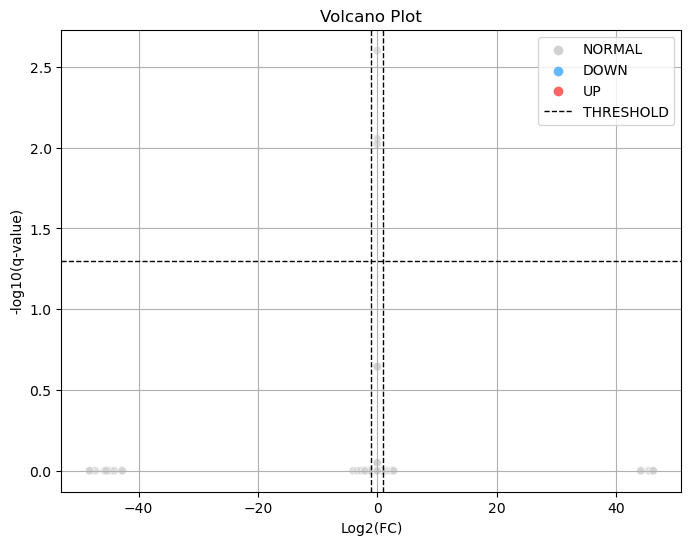

In [43]:
import seaborn as sns
colors2 = {"NORMAL":"#D2D2D2", "UP":"#FF6462", "DOWN":"#62B8FF"}
plt.figure(figsize = (8, 6))

sns.scatterplot(x = t_results['log_fc'], y = -np.log10(t_results['q_value']), hue = t_results['sign'], palette = colors2, alpha = 0.7)
plt.axhline(-np.log10(0.05), color = 'k', linestyle = '--', linewidth = 1, label = 'THRESHOLD')
plt.axvline(1, color = 'k', linestyle = '--', linewidth = 1)
plt.axvline(-1, color = 'k', linestyle = '--', linewidth = 1)

plt.xlabel('Log2(FC)')
plt.ylabel('-log10(q-value)')
plt.title('Volcano Plot')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
from scipy import stats
from statsmodels.stats import multitest

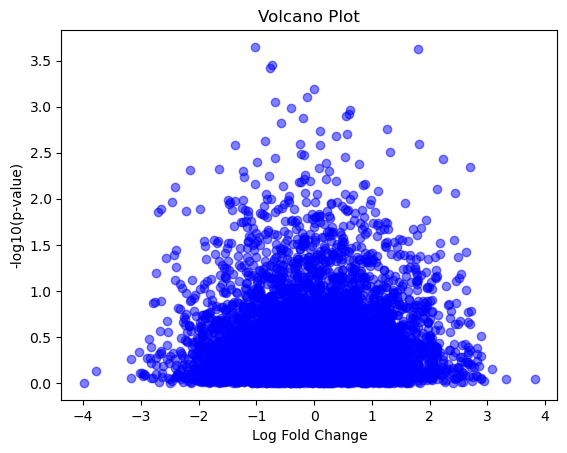

In [42]:
log_fold_change_values = np.random.normal(size=len(t_fluxes_df.columns))
p_values = np.random.uniform(size=len(t_fluxes_df.columns))

# Create a volcano plot
plt.scatter(log_fold_change_values, -np.log10(p_values), color='blue', alpha=0.5)
plt.title('Volcano Plot')
plt.xlabel('Log Fold Change')
plt.ylabel('-log10(p-value)')
plt.show()

# ------------------------------------------------------------------------------------

In [2]:
normal_model1 = cobra.io.load_matlab_model("C:/Users/NOE/Desktop/Mostres TFG Obtingudes/NormalModel_GTEX_111CU_0126_SM_5GZWZ.mat")
normal_model2 = cobra.io.load_matlab_model("C:/Users/NOE/Desktop/Mostres TFG Obtingudes/NormalModel_GTEX_111YS_0126_SM_5987T.mat")
normal_model3 = cobra.io.load_matlab_model("C:/Users/NOE/Desktop/Mostres TFG Obtingudes/NormalModel_GTEX_1122O_0326_SM_5H124.mat")
cancer_model1 = cobra.io.load_matlab_model("C:/Users/NOE/Desktop/Mostres TFG Obtingudes/CancerModel_aa51d383_ce36_4247_bfcd_d104a121f7d3_4e605b10_da43_45f0_a43d_27.mat")
cancer_model2 = cobra.io.load_matlab_model("C:/Users/NOE/Desktop/Mostres TFG Obtingudes/CancerModel_x2f7e6f7f_a4f9_4849_8add_3fbafb75b5c2_9406f2f9_832a_42e7_b5e9_a.mat")
cancer_model3 = cobra.io.load_matlab_model("C:/Users/NOE/Desktop/Mostres TFG Obtingudes/CancerModel_x3fadb519_dd1a_4765_be25_e7ecaaa9b8e0_8919cfd0_6cd6_423f_9231_4.mat")

No defined compartments in model ContextModel_normal. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model ContextModel_normal. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model ContextModel_normal. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model ContextModel_Cancer. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model ContextModel_Cancer. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following

In [3]:
normal_model1

Name,ContextModel_normal
Memory address,297272775d0
Number of metabolites,3925
Number of reactions,5738
Number of genes,2248
Number of groups,95
Objective expression,1.0*biomass_maintenance - 1.0*biomass_maintenance_reverse_95d2f
Compartments,"c, l, m, r, e, x, n, g, i"


In [4]:
normal_model2

Name,ContextModel_normal
Memory address,2972705be90
Number of metabolites,3896
Number of reactions,5679
Number of genes,2248
Number of groups,96
Objective expression,1.0*biomass_maintenance - 1.0*biomass_maintenance_reverse_95d2f
Compartments,"c, l, m, r, e, x, n, g, i"


In [5]:
normal_model3

Name,ContextModel_normal
Memory address,2972deb2190
Number of metabolites,3289
Number of reactions,4538
Number of genes,2248
Number of groups,93
Objective expression,1.0*biomass_maintenance - 1.0*biomass_maintenance_reverse_95d2f
Compartments,"c, l, m, r, e, x, g, n, i"


In [6]:
cancer_model1

Name,ContextModel_Cancer
Memory address,29736723ed0
Number of metabolites,3900
Number of reactions,5791
Number of genes,2248
Number of groups,95
Objective expression,1.0*biomass_maintenance - 1.0*biomass_maintenance_reverse_95d2f
Compartments,"c, l, m, r, e, x, n, g, i"


In [7]:
cancer_model2

Name,ContextModel_Cancer
Memory address,29738633c50
Number of metabolites,3779
Number of reactions,5492
Number of genes,2248
Number of groups,97
Objective expression,1.0*biomass_maintenance - 1.0*biomass_maintenance_reverse_95d2f
Compartments,"c, l, m, e, x, n, r, g, i"


In [8]:
cancer_model3

Name,ContextModel_Cancer
Memory address,29737e80990
Number of metabolites,3872
Number of reactions,5651
Number of genes,2248
Number of groups,96
Objective expression,1.0*biomass_maintenance - 1.0*biomass_maintenance_reverse_95d2f
Compartments,"c, l, m, r, e, x, n, g, i"


## Flux Balance Analysis (FBA)

### Normal Model 1

In [9]:
solution_normal1=normal_model1.optimize()
print(solution_normal1)

<Solution 278.730 at 0x29740e955d0>


In [10]:
solution_normal1

,fluxes,reduced_costs
10FTHF7GLUtl,0.0,0.000000e+00
10FTHF7GLUtm,0.0,0.000000e+00
10FTHFtl,0.0,-0.000000e+00
11DOCRTSLtm,0.0,0.000000e+00
11DOCRTSLtr,0.0,0.000000e+00
...,...,...
DM_CE1562[c],0.0,0.000000e+00
DM_CE5025[c],0.0,-1.810872e-17
DM_btn[n],0.0,0.000000e+00
Htmi,0.0,-1.004890e-18


In [11]:
x_normal1 = solution_normal1.objective_value
print('La biomassa del model normal 1 és:', x_normal1)

La biomassa del model normal 1 és: 278.7301589121864


### Model Normal 2:

In [12]:
solution_normal2=normal_model2.optimize()
print(solution_normal2)

<Solution 280.619 at 0x29740e94650>


In [13]:
solution_normal2

,fluxes,reduced_costs
10FTHF7GLUtl,0.0,-2.775558e-17
10FTHF7GLUtm,0.0,0.000000e+00
10FTHFtl,0.0,0.000000e+00
10FTHFtm,0.0,-0.000000e+00
11DOCRTSLtm,0.0,-0.000000e+00
...,...,...
DM_CE1562[c],0.0,0.000000e+00
DM_1a2425thvitd2[m],0.0,0.000000e+00
DM_btn[n],0.0,0.000000e+00
Htmi,0.0,-5.646801e-18


In [14]:
x_normal2 = solution_normal2.objective_value
print('La biomassa del model de Normal 2 és:', x_normal2)

La biomassa del model de Normal 2 és: 280.61918360952194


### Normal Model 3

In [15]:
solution_normal3= normal_model3.optimize()
print(solution_normal3)

<Solution 239.457 at 0x29740e8e890>


In [16]:
solution_normal3

,fluxes,reduced_costs
10FTHF7GLUtl,0.0,0.000000e+00
10FTHF7GLUtm,0.0,9.860761e-32
10FTHFtl,0.0,-0.000000e+00
10FTHFtm,0.0,0.000000e+00
11DOCRTSLtm,0.0,-0.000000e+00
...,...,...
DM_4abut[c],0.0,0.000000e+00
DM_srtn[c],0.0,0.000000e+00
DM_btn[n],0.0,0.000000e+00
Htmi,0.0,9.636636e-18


In [17]:
x_normal3 = solution_normal3.objective_value
print('La biomassa del model de Normal 3 és:', x_normal3)

La biomassa del model de Normal 3 és: 239.45693848269846


### Cancer Model 1

In [18]:
solution_cancer1=cancer_model1.optimize()
print(solution_cancer1)

<Solution 273.843 at 0x29740e8d110>


In [19]:
solution_cancer1

,fluxes,reduced_costs
10FTHF7GLUtl,0.0,0.000000e+00
10FTHF7GLUtm,0.0,0.000000e+00
10FTHFtl,0.0,-0.000000e+00
10FTHFtm,0.0,-0.000000e+00
11DOCRTSLtm,0.0,0.000000e+00
...,...,...
DM_kynate[c],0.0,0.000000e+00
DM_1a2425thvitd2[m],0.0,0.000000e+00
DM_btn[n],0.0,0.000000e+00
Htmi,0.0,-6.356126e-04


In [20]:
x_cancer1 = solution_cancer1.objective_value
print('La biomassa del model de Cancer 1 és:', x_cancer1)

La biomassa del model de Cancer 1 és: 273.84308915825545


### Cancer Model 2

In [21]:
solution_cancer2=cancer_model2.optimize()
print(solution_cancer2)

<Solution 301.901 at 0x29740e82950>


In [24]:
solution_cancer2


,fluxes,reduced_costs
10FTHF7GLUtl,0.0,0.000000e+00
10FTHF7GLUtm,0.0,-2.168404e-19
10FTHFtl,0.0,-0.000000e+00
10FTHFtm,-1000.0,-0.000000e+00
13DAMPPOX,0.0,-4.745937e-02
...,...,...
DM_kynate[c],0.0,0.000000e+00
DM_1a2425thvitd2[m],0.0,0.000000e+00
DM_btn[n],0.0,0.000000e+00
Htmi,0.0,-8.673617e-19


In [22]:

x_cancer2 = solution_cancer2.objective_value
print('La biomassa del model de Cancer 2 és:', x_cancer2)

La biomassa del model de Cancer 2 és: 301.9010149634276


### Cancer Model 3

In [23]:
solution_cancer3=cancer_model3.optimize()
print(solution_cancer3)

<Solution 242.121 at 0x29740e81e10>


In [24]:
solution_cancer3

,fluxes,reduced_costs
10FTHF7GLUtl,0.0,-3.081488e-33
10FTHF7GLUtm,0.0,0.000000e+00
10FTHFtl,0.0,-0.000000e+00
10FTHFtm,0.0,-0.000000e+00
11DOCRTSLtm,0.0,0.000000e+00
...,...,...
DM_4glu56dihdind[c],0.0,-1.163794e-17
DM_kynate[c],0.0,0.000000e+00
DM_btn[n],0.0,0.000000e+00
Htmi,0.0,-7.703720e-34


In [25]:
x_cancer3 = solution_cancer3.objective_value
print('La biomassa del model de Cancer 3 és:', x_cancer3)

La biomassa del model de Cancer 3 és: 242.12137060065464


## HISTOGRAMA

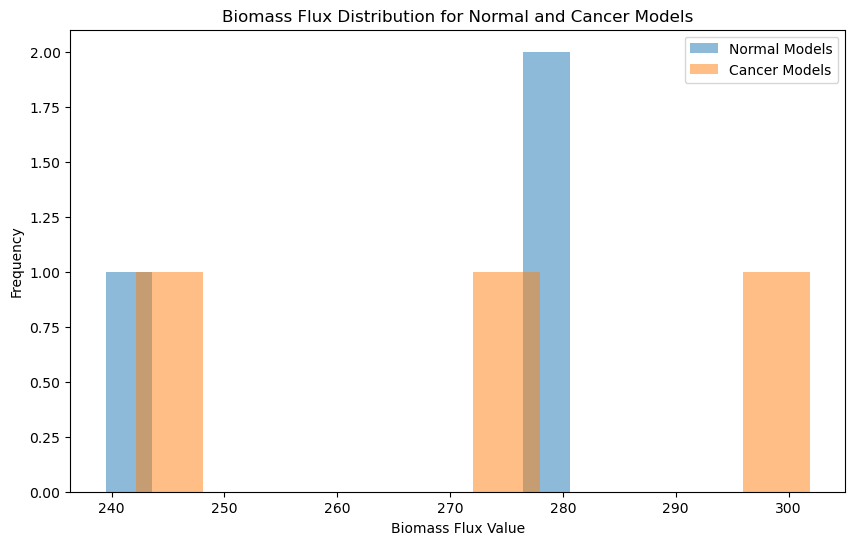

In [27]:
normal_biomass_flux_values = [solution_normal1.objective_value,
                              solution_normal2.objective_value,
                              solution_normal3.objective_value]
cancer_biomass_flux_values = [solution_cancer1.objective_value,
                              solution_cancer2.objective_value,
                              solution_cancer3.objective_value]

# Create histograms
plt.figure(figsize=(10, 6))
plt.hist(normal_biomass_flux_values, bins=10, alpha=0.5, label='Normal Models')
plt.hist(cancer_biomass_flux_values, bins=10, alpha=0.5, label='Cancer Models')

# Add labels and title
plt.xlabel('Biomass Flux Value')
plt.ylabel('Frequency')
plt.title('Biomass Flux Distribution for Normal and Cancer Models')
plt.legend()

# Show the plot
plt.show()

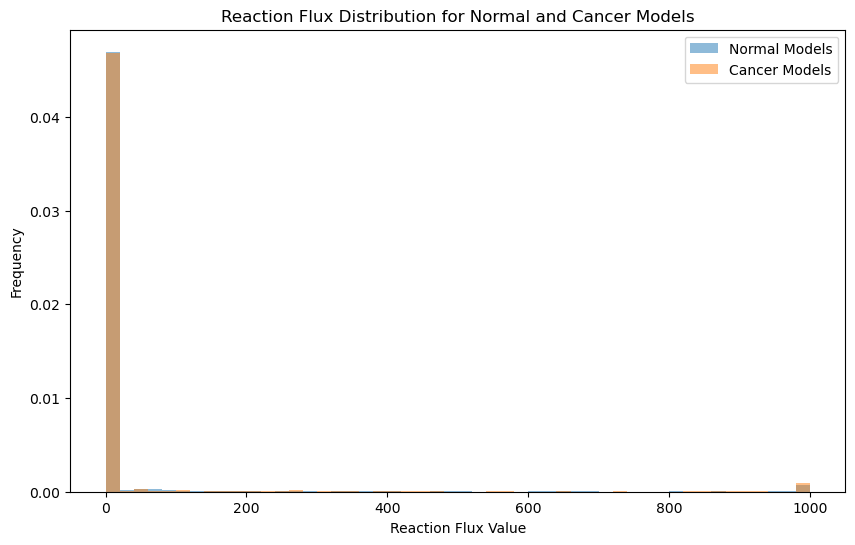

In [28]:
normal_flux_values = []
for model_solution in [solution_normal1, solution_normal2, solution_normal3]:
    flux_values = [abs(value) for value in model_solution.fluxes.values]
    normal_flux_values.extend(flux_values)

# Extract reaction flux values for cancer models
cancer_flux_values = []
for model_solution in [solution_cancer1, solution_cancer2, solution_cancer3]:
    flux_values = [abs(value) for value in model_solution.fluxes.values]
    cancer_flux_values.extend(flux_values)

# Create histograms
plt.figure(figsize=(10, 6))
plt.hist(normal_flux_values, bins=50, alpha=0.5, label='Normal Models', density=True)
plt.hist(cancer_flux_values, bins=50, alpha=0.5, label='Cancer Models', density=True)

# Add labels and title
plt.xlabel('Reaction Flux Value')
plt.ylabel('Frequency')
plt.title('Reaction Flux Distribution for Normal and Cancer Models')
plt.legend()

# Show the plot
plt.show()

C:\Users\NOE\AppData\Local\Temp\ipykernel_3772\1286089472.py:8: RuntimeWarning: invalid value encountered in log2
  log_fold_change = np.log2(cancer_flux_values + 1) - np.log2(normal_flux_values + 1)


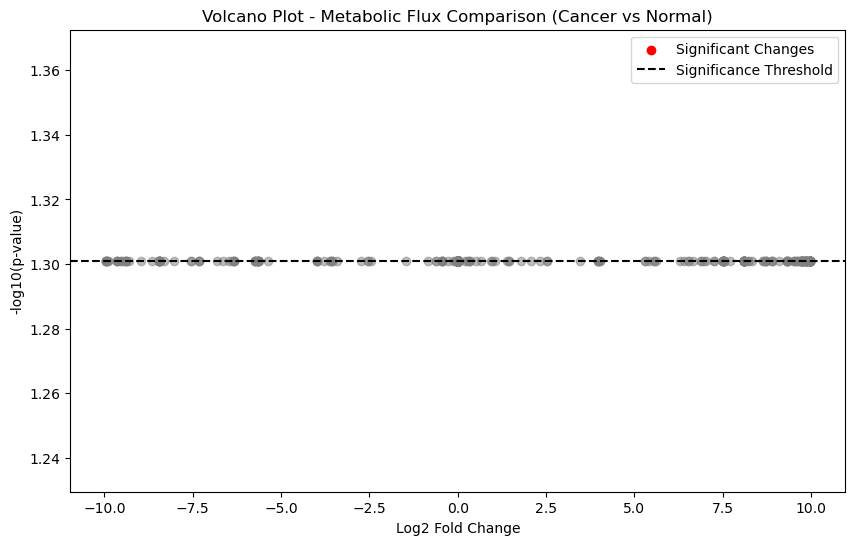

In [29]:
normal_reaction_names = solution_normal1.fluxes.index.tolist()
cancer_reaction_names = solution_cancer1.fluxes.index.tolist()
common_reaction_names = list(set(normal_reaction_names).intersection(cancer_reaction_names))

normal_flux_values = solution_normal1.fluxes.loc[common_reaction_names].values
cancer_flux_values = solution_cancer1.fluxes.loc[common_reaction_names].values

log_fold_change = np.log2(cancer_flux_values + 1) - np.log2(normal_flux_values + 1)
p_value = 0.05  # Replace this with your actual p-values or significance values
neg_log_p_value = -np.log10(p_value)
volcano_df = pd.DataFrame({
    'Log2 Fold Change': log_fold_change,
    '-log10(p-value)': neg_log_p_value
}, index=common_reaction_names)

# Set a significance threshold for highlighting points
significance_threshold = -np.log10(0.05)
plt.figure(figsize=(10, 6))
plt.scatter(volcano_df['Log2 Fold Change'], volcano_df['-log10(p-value)'], c='gray', alpha=0.5)
plt.scatter(volcano_df.loc[volcano_df['-log10(p-value)'] > significance_threshold, 'Log2 Fold Change'],
            volcano_df.loc[volcano_df['-log10(p-value)'] > significance_threshold, '-log10(p-value)'],
            c='red', label='Significant Changes')
plt.axhline(y=significance_threshold, color='black', linestyle='--', label='Significance Threshold')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot - Metabolic Flux Comparison (Cancer vs Normal)')
plt.legend()
plt.show()

(array([3.50e+01, 0.00e+00, 4.00e+00, 0.00e+00, 1.00e+00, 7.00e+00,
        1.00e+00, 4.00e+00, 5.00e+00, 5.00e+00, 7.00e+00, 9.00e+00,
        6.00e+00, 8.00e+00, 1.16e+02, 5.41e+03, 1.90e+01, 1.30e+01,
        5.00e+00, 6.00e+00, 1.30e+01, 2.00e+00, 7.00e+00, 0.00e+00,
        7.00e+00, 8.00e+00, 4.00e+00, 7.00e+00, 1.00e+00, 2.80e+01]),
 array([-1000.        ,  -933.33333333,  -866.66666667,  -800.        ,
         -733.33333333,  -666.66666667,  -600.        ,  -533.33333333,
         -466.66666667,  -400.        ,  -333.33333333,  -266.66666667,
         -200.        ,  -133.33333333,   -66.66666667,     0.        ,
           66.66666667,   133.33333333,   200.        ,   266.66666667,
          333.33333333,   400.        ,   466.66666667,   533.33333333,
          600.        ,   666.66666667,   733.33333333,   800.        ,
          866.66666667,   933.33333333,  1000.        ]),
 <BarContainer object of 30 artists>)

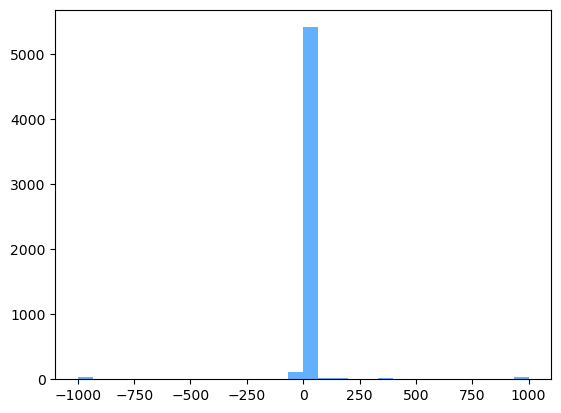

In [30]:
tabla_flujos_normal1={'Flujos_Normal1':solution_normal1.fluxes}
tabla_flujos_normal1=pd.DataFrame(tabla_flujos_normal1)
plt.hist(tabla_flujos_normal1['Flujos_Normal1'], bins=30, color='dodgerblue', alpha=0.7)

In [31]:
tabla_flujos_normal1={'Flujos_Normal1':solution_normal1.fluxes}
tabla_flujos_normal1=pd.DataFrame(tabla_flujos_normal1)
tabla_flujos_normal1

,Flujos_Normal1
10FTHF7GLUtl,0.0
10FTHF7GLUtm,0.0
10FTHFtl,0.0
11DOCRTSLtm,0.0
11DOCRTSLtr,0.0
...,...
DM_CE1562[c],0.0
DM_CE5025[c],0.0
DM_btn[n],0.0
Htmi,0.0


(array([5.10e+01, 2.00e+00, 7.00e+00, 2.00e+00, 1.00e+00, 8.00e+00,
        1.00e+00, 2.00e+00, 1.00e+00, 4.00e+00, 2.00e+00, 3.00e+00,
        4.00e+00, 1.20e+01, 5.33e+03, 1.18e+02, 1.20e+01, 1.00e+00,
        6.00e+00, 6.00e+00, 3.00e+00, 1.00e+00, 1.00e+01, 1.00e+00,
        1.90e+01, 2.00e+00, 1.00e+00, 2.00e+00, 4.00e+00, 6.30e+01]),
 array([-1.00000000e+03, -9.33333333e+02, -8.66666667e+02, -8.00000000e+02,
        -7.33333333e+02, -6.66666667e+02, -6.00000000e+02, -5.33333333e+02,
        -4.66666667e+02, -4.00000000e+02, -3.33333333e+02, -2.66666667e+02,
        -2.00000000e+02, -1.33333333e+02, -6.66666667e+01,  1.13686838e-13,
         6.66666667e+01,  1.33333333e+02,  2.00000000e+02,  2.66666667e+02,
         3.33333333e+02,  4.00000000e+02,  4.66666667e+02,  5.33333333e+02,
         6.00000000e+02,  6.66666667e+02,  7.33333333e+02,  8.00000000e+02,
         8.66666667e+02,  9.33333333e+02,  1.00000000e+03]),
 <BarContainer object of 30 artists>)

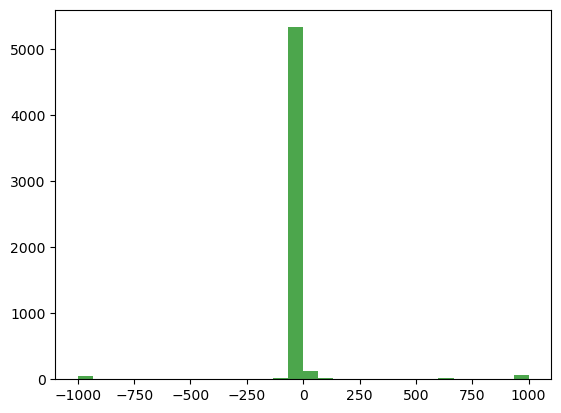

In [32]:
tabla_flujos_normal2={'Flujos_Normal2':solution_normal2.fluxes}
tabla_flujos_normal2=pd.DataFrame(tabla_flujos_normal2)

plt.hist(tabla_flujos_normal2['Flujos_Normal2'], bins=30, color='green', alpha=0.7)

In [33]:
tabla_flujos_normal2

,Flujos_Normal2
10FTHF7GLUtl,0.0
10FTHF7GLUtm,0.0
10FTHFtl,0.0
10FTHFtm,0.0
11DOCRTSLtm,0.0
...,...
DM_CE1562[c],0.0
DM_1a2425thvitd2[m],0.0
DM_btn[n],0.0
Htmi,0.0


(array([3.700e+01, 3.000e+00, 3.000e+00, 2.000e+00, 5.000e+00, 4.000e+00,
        1.000e+00, 7.000e+00, 6.000e+00, 1.200e+01, 7.000e+00, 5.000e+00,
        6.000e+00, 2.200e+01, 4.141e+03, 7.000e+01, 5.700e+01, 1.400e+01,
        4.000e+00, 1.300e+01, 1.900e+01, 1.200e+01, 1.600e+01, 4.000e+00,
        7.000e+00, 1.200e+01, 5.000e+00, 1.000e+00, 3.000e+00, 4.000e+01]),
 array([-1.00000000e+03, -9.33333333e+02, -8.66666667e+02, -8.00000000e+02,
        -7.33333333e+02, -6.66666667e+02, -6.00000000e+02, -5.33333333e+02,
        -4.66666667e+02, -4.00000000e+02, -3.33333333e+02, -2.66666667e+02,
        -2.00000000e+02, -1.33333333e+02, -6.66666667e+01,  1.13686838e-13,
         6.66666667e+01,  1.33333333e+02,  2.00000000e+02,  2.66666667e+02,
         3.33333333e+02,  4.00000000e+02,  4.66666667e+02,  5.33333333e+02,
         6.00000000e+02,  6.66666667e+02,  7.33333333e+02,  8.00000000e+02,
         8.66666667e+02,  9.33333333e+02,  1.00000000e+03]),
 <BarContainer object of 30 artists

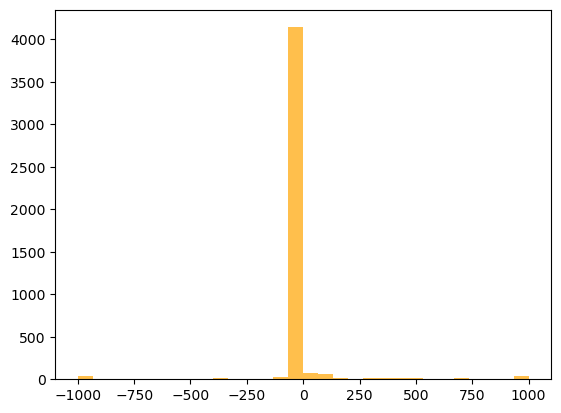

In [34]:
tabla_flujos_normal3={'Flujos_Normal3':solution_normal3.fluxes}
tabla_flujos_normal3=pd.DataFrame(tabla_flujos_normal3)

plt.hist(tabla_flujos_normal3['Flujos_Normal3'], bins=30, color='orange', alpha=0.7)

In [35]:
tabla_flujos_normal3

,Flujos_Normal3
10FTHF7GLUtl,0.0
10FTHF7GLUtm,0.0
10FTHFtl,0.0
10FTHFtm,0.0
11DOCRTSLtm,0.0
...,...
DM_4abut[c],0.0
DM_srtn[c],0.0
DM_btn[n],0.0
Htmi,0.0


In [36]:
flujos_normal=pd.concat([tabla_flujos_normal1,tabla_flujos_normal2,tabla_flujos_normal3])
flujos_normal

,Flujos_Normal1,Flujos_Normal2,Flujos_Normal3
10FTHF7GLUtl,0.0,NaN,NaN
10FTHF7GLUtm,0.0,NaN,NaN
10FTHFtl,0.0,NaN,NaN
11DOCRTSLtm,0.0,NaN,NaN
11DOCRTSLtr,0.0,NaN,NaN
...,...,...,...
DM_4abut[c],NaN,NaN,0.0
DM_srtn[c],NaN,NaN,0.0
DM_btn[n],NaN,NaN,0.0
Htmi,NaN,NaN,0.0


(array([6.900e+01, 1.000e+01, 6.000e+00, 3.000e+00, 4.000e+00, 2.000e+00,
        3.000e+00, 5.000e+00, 3.000e+00, 9.000e+00, 1.000e+01, 9.000e+00,
        1.400e+01, 9.000e+00, 5.361e+03, 5.600e+01, 1.500e+01, 2.200e+01,
        6.000e+00, 2.800e+01, 3.000e+00, 6.000e+00, 4.000e+00, 2.000e+00,
        1.000e+01, 3.000e+00, 4.000e+00, 1.600e+01, 1.900e+01, 8.000e+01]),
 array([-1.00000000e+03, -9.33333333e+02, -8.66666667e+02, -8.00000000e+02,
        -7.33333333e+02, -6.66666667e+02, -6.00000000e+02, -5.33333333e+02,
        -4.66666667e+02, -4.00000000e+02, -3.33333333e+02, -2.66666667e+02,
        -2.00000000e+02, -1.33333333e+02, -6.66666667e+01,  1.13686838e-13,
         6.66666667e+01,  1.33333333e+02,  2.00000000e+02,  2.66666667e+02,
         3.33333333e+02,  4.00000000e+02,  4.66666667e+02,  5.33333333e+02,
         6.00000000e+02,  6.66666667e+02,  7.33333333e+02,  8.00000000e+02,
         8.66666667e+02,  9.33333333e+02,  1.00000000e+03]),
 <BarContainer object of 30 artists

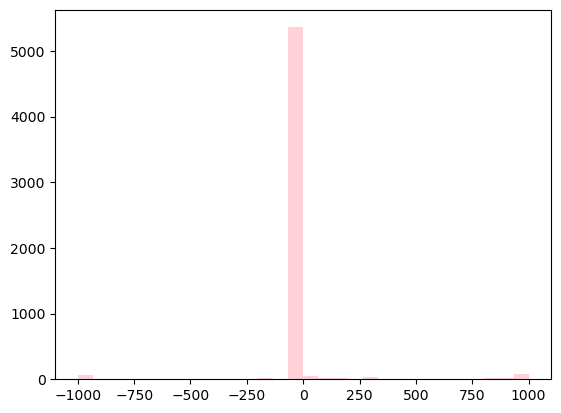

In [37]:
tabla_flujos_cancer1={'Flujos_Cancer1':solution_cancer1.fluxes}
tabla_flujos_cancer1=pd.DataFrame(tabla_flujos_cancer1)

plt.hist(tabla_flujos_cancer1['Flujos_Cancer1'], bins=30, color='pink', alpha=0.7)

In [38]:
tabla_flujos_cancer1

,Flujos_Cancer1
10FTHF7GLUtl,0.0
10FTHF7GLUtm,0.0
10FTHFtl,0.0
10FTHFtm,0.0
11DOCRTSLtm,0.0
...,...
DM_kynate[c],0.0
DM_1a2425thvitd2[m],0.0
DM_btn[n],0.0
Htmi,0.0


(array([6.50e+01, 9.00e+00, 2.00e+00, 4.00e+00, 5.00e+00, 4.00e+00,
        1.00e+01, 6.00e+00, 8.00e+00, 5.00e+00, 9.00e+00, 1.80e+01,
        3.00e+00, 1.60e+01, 6.50e+01, 5.02e+03, 2.50e+01, 7.00e+00,
        3.20e+01, 2.10e+01, 8.00e+00, 1.10e+01, 6.00e+00, 1.10e+01,
        1.10e+01, 1.20e+01, 2.00e+00, 2.00e+00, 2.10e+01, 7.40e+01]),
 array([-1000.        ,  -933.33333333,  -866.66666667,  -800.        ,
         -733.33333333,  -666.66666667,  -600.        ,  -533.33333333,
         -466.66666667,  -400.        ,  -333.33333333,  -266.66666667,
         -200.        ,  -133.33333333,   -66.66666667,     0.        ,
           66.66666667,   133.33333333,   200.        ,   266.66666667,
          333.33333333,   400.        ,   466.66666667,   533.33333333,
          600.        ,   666.66666667,   733.33333333,   800.        ,
          866.66666667,   933.33333333,  1000.        ]),
 <BarContainer object of 30 artists>)

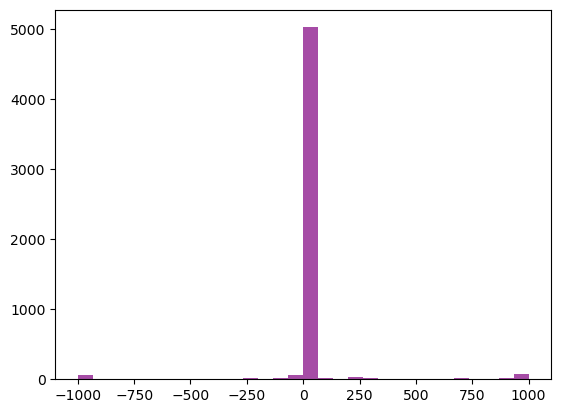

In [39]:
tabla_flujos_cancer2={'Flujos_Cancer2':solution_cancer2.fluxes}
tabla_flujos_cancer2=pd.DataFrame(tabla_flujos_cancer2)

plt.hist(tabla_flujos_cancer2['Flujos_Cancer2'], bins=30, color='purple', alpha=0.7)

In [40]:
tabla_flujos_cancer2

,Flujos_Cancer2
10FTHF7GLUtl,0.0
10FTHF7GLUtm,0.0
10FTHFtl,0.0
10FTHFtm,-1000.0
13DAMPPOX,0.0
...,...
DM_kynate[c],0.0
DM_1a2425thvitd2[m],0.0
DM_btn[n],0.0
Htmi,0.0


(array([2.30e+01, 2.00e+00, 0.00e+00, 2.00e+00, 1.00e+00, 2.00e+00,
        0.00e+00, 2.00e+00, 7.00e+00, 3.00e+00, 2.00e+00, 6.00e+00,
        5.00e+00, 1.70e+01, 5.38e+03, 1.01e+02, 2.00e+01, 1.10e+01,
        7.00e+00, 8.00e+00, 6.00e+00, 4.00e+00, 3.00e+00, 4.00e+00,
        1.00e+00, 2.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 2.90e+01]),
 array([-1.00000000e+03, -9.33333333e+02, -8.66666667e+02, -8.00000000e+02,
        -7.33333333e+02, -6.66666667e+02, -6.00000000e+02, -5.33333333e+02,
        -4.66666667e+02, -4.00000000e+02, -3.33333333e+02, -2.66666667e+02,
        -2.00000000e+02, -1.33333333e+02, -6.66666667e+01,  4.54747351e-13,
         6.66666667e+01,  1.33333333e+02,  2.00000000e+02,  2.66666667e+02,
         3.33333333e+02,  4.00000000e+02,  4.66666667e+02,  5.33333333e+02,
         6.00000000e+02,  6.66666667e+02,  7.33333333e+02,  8.00000000e+02,
         8.66666667e+02,  9.33333333e+02,  1.00000000e+03]),
 <BarContainer object of 30 artists>)

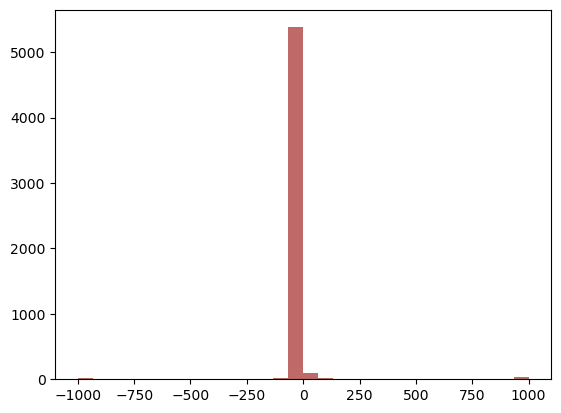

In [41]:
tabla_flujos_cancer3={'Flujos_Cancer3':solution_cancer3.fluxes}
tabla_flujos_cancer3=pd.DataFrame(tabla_flujos_cancer3)

plt.hist(tabla_flujos_cancer3['Flujos_Cancer3'], bins=30, color='brown', alpha=0.7)

In [42]:
tabla_flujos_cancer3

,Flujos_Cancer3
10FTHF7GLUtl,0.0
10FTHF7GLUtm,0.0
10FTHFtl,0.0
10FTHFtm,0.0
11DOCRTSLtm,0.0
...,...
DM_4glu56dihdind[c],0.0
DM_kynate[c],0.0
DM_btn[n],0.0
Htmi,0.0


In [43]:
flujos_cancer=pd.concat([tabla_flujos_cancer1,tabla_flujos_cancer2,tabla_flujos_cancer3],axis=1)
flujos_cancer

,Flujos_Cancer1,Flujos_Cancer2,Flujos_Cancer3
10FTHF7GLUtl,0.0,0.0,0.000000
10FTHF7GLUtm,0.0,0.0,0.000000
10FTHFtl,0.0,0.0,0.000000
10FTHFtm,0.0,-1000.0,0.000000
11DOCRTSLtm,0.0,NaN,0.000000
...,...,...,...
1A25HVITD2t,NaN,NaN,0.000000
1A25HVITD2tm,NaN,NaN,0.000000
EX_1a25dhvitd2[e],NaN,NaN,0.000000
sink_leu_L[c],NaN,NaN,-45.102369


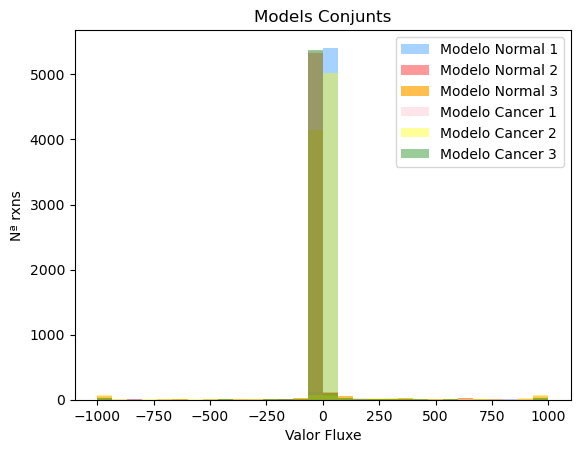

In [44]:
fluxesM=pd.concat([tabla_flujos_normal1, tabla_flujos_normal2, tabla_flujos_normal3, tabla_flujos_cancer1, tabla_flujos_cancer2, tabla_flujos_cancer3], axis=1) 
fluxesM   
plt.hist(fluxesM['Flujos_Normal1'], bins=30, color='dodgerblue', alpha=0.4, label='Modelo Normal 1')
plt.hist(fluxesM['Flujos_Normal2'], bins=30, color='red', alpha=0.4, label='Modelo Normal 2')
plt.hist(fluxesM['Flujos_Normal3'], bins=30, color='orange', alpha=0.7, label='Modelo Normal 3')
plt.hist(fluxesM['Flujos_Cancer1'], bins=30, color='pink', alpha=0.4, label='Modelo Cancer 1')
plt.hist(fluxesM['Flujos_Cancer2'], bins=30, color='yellow', alpha=0.4, label='Modelo Cancer 2')
plt.hist(fluxesM['Flujos_Cancer3'], bins=30, color='green', alpha=0.4, label='Modelo Cancer 3')

plt.title('Models Conjunts')
plt.xlabel('Valor Fluxe')
plt.ylabel('Nª rxns')
plt.legend(loc='upper right')
plt.grid(False)

## TRANSFORMAR DADES

In [45]:
def flux_transformer(v):
    '''
    This function transforms fluxes into log2 scale with three additions:
    - zero values are kept.
    - values between 0 and 2 are adjusted to fit below one.
    - negative fluxes are considered. 
    '''

    def adjusted(v):
        new = (np.log2(v + 0.125) + 3) / 4
        return np.min([new, 1])

    if v == 0:
        vprime = 0
    elif v > 0:
        if v < 2:
            vprime = adjusted(v)
        else:
            vprime = np.log2(v)
    elif v < 0:
        v = np.abs(v)
        if v < 2:
            vprime = -adjusted(v)
        else:
            vprime = -np.log2(v)
    else:
        raise ValueError('found value not considered')

    return vprime

In [46]:
flujos_t_normal1 = tabla_flujos_normal1.applymap(flux_transformer)
flujos_t_normal1

,Flujos_Normal1
10FTHF7GLUtl,0.0
10FTHF7GLUtm,0.0
10FTHFtl,0.0
11DOCRTSLtm,0.0
11DOCRTSLtr,0.0
...,...
DM_CE1562[c],0.0
DM_CE5025[c],0.0
DM_btn[n],0.0
Htmi,0.0


(array([  71.,   21.,   14.,   15.,   30., 5425.,   22.,   20.,   34.,
          86.]),
 array([-9.96578428, -7.97262743, -5.97947057, -3.98631371, -1.99315686,
         0.        ,  1.99315686,  3.98631371,  5.97947057,  7.97262743,
         9.96578428]),
 <BarContainer object of 10 artists>)

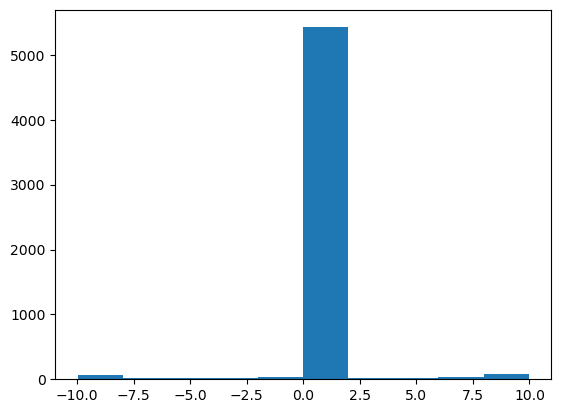

In [47]:
plt.hist(flujos_t_normal1)

In [48]:
flujos_t_normal2 = tabla_flujos_normal2.applymap(flux_transformer)
flujos_t_normal2

,Flujos_Normal2
10FTHF7GLUtl,0.0
10FTHF7GLUtm,0.0
10FTHFtl,0.0
10FTHFtm,0.0
11DOCRTSLtm,0.0
...,...
DM_CE1562[c],0.0
DM_1a2425thvitd2[m],0.0
DM_btn[n],0.0
Htmi,0.0


(array([  81.,   19.,   50.,   15.,   57., 5223.,   22.,   81.,   19.,
         112.]),
 array([-9.96578428, -7.97262743, -5.97947057, -3.98631371, -1.99315686,
         0.        ,  1.99315686,  3.98631371,  5.97947057,  7.97262743,
         9.96578428]),
 <BarContainer object of 10 artists>)

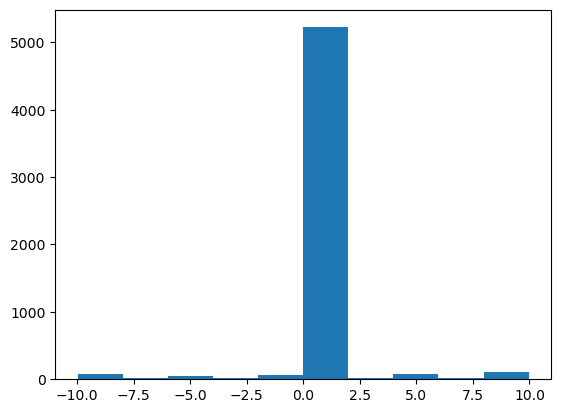

In [49]:
plt.hist(flujos_t_normal2)

In [50]:
flujos_t_normal3 = tabla_flujos_normal3.applymap(flux_transformer)
flujos_t_normal3

,Flujos_Normal3
10FTHF7GLUtl,0.0
10FTHF7GLUtm,0.0
10FTHFtl,0.0
10FTHFtm,0.0
11DOCRTSLtm,0.0
...,...
DM_4abut[c],0.0
DM_srtn[c],0.0
DM_btn[n],0.0
Htmi,0.0


(array([  87.,   33.,   20.,   10.,   20., 4109.,   23.,   28.,   75.,
         133.]),
 array([-9.96578428, -7.97262743, -5.97947057, -3.98631371, -1.99315686,
         0.        ,  1.99315686,  3.98631371,  5.97947057,  7.97262743,
         9.96578428]),
 <BarContainer object of 10 artists>)

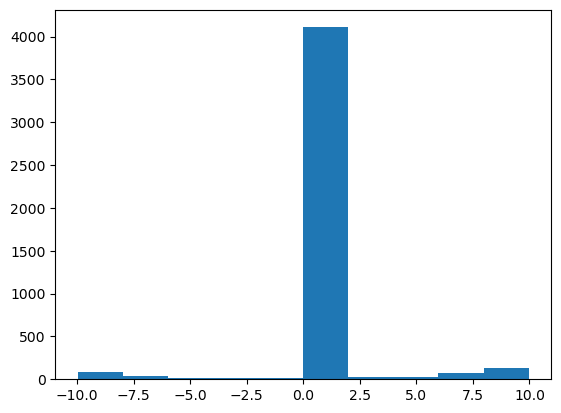

In [53]:
plt.hist(flujos_t_normal3)

In [54]:
flujos_t_cancer1 = tabla_flujos_cancer1.applymap(flux_transformer)
flujos_t_cancer1

,Flujos_Cancer1
10FTHF7GLUtl,0.0
10FTHF7GLUtm,0.0
10FTHFtl,0.0
10FTHFtm,0.0
11DOCRTSLtm,0.0
...,...
DM_kynate[c],0.0
DM_1a2425thvitd2[m],0.0
DM_btn[n],0.0
Htmi,0.0


(array([ 124.,   33.,   14.,   14.,   39., 5305.,   22.,   17.,   48.,
         175.]),
 array([-9.96578428, -7.97262743, -5.97947057, -3.98631371, -1.99315686,
         0.        ,  1.99315686,  3.98631371,  5.97947057,  7.97262743,
         9.96578428]),
 <BarContainer object of 10 artists>)

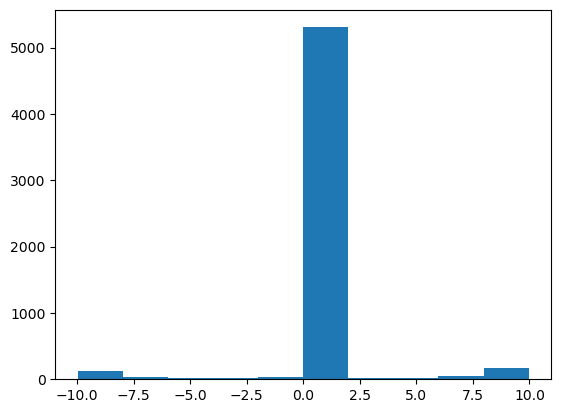

In [55]:
plt.hist(flujos_t_cancer1)

In [56]:
flujos_t_cancer2 = tabla_flujos_cancer2.applymap(flux_transformer)
flujos_t_cancer2

,Flujos_Cancer2
10FTHF7GLUtl,0.000000
10FTHF7GLUtm,0.000000
10FTHFtl,0.000000
10FTHFtm,-9.965784
13DAMPPOX,0.000000
...,...
DM_kynate[c],0.000000
DM_1a2425thvitd2[m],0.000000
DM_btn[n],0.000000
Htmi,0.000000


(array([ 131.,   33.,   20.,   15.,   28., 4961.,   16.,   45.,   62.,
         181.]),
 array([-9.96578428, -7.97262743, -5.97947057, -3.98631371, -1.99315686,
         0.        ,  1.99315686,  3.98631371,  5.97947057,  7.97262743,
         9.96578428]),
 <BarContainer object of 10 artists>)

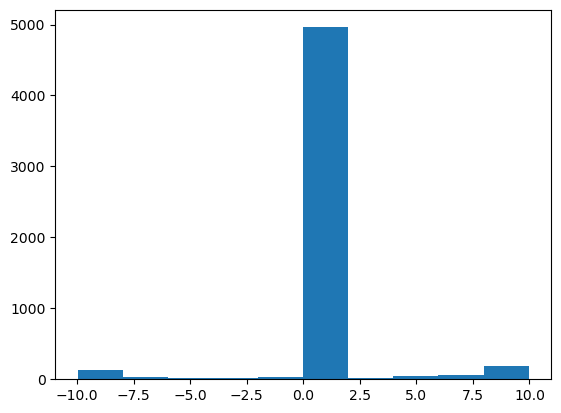

In [57]:
plt.hist(flujos_t_cancer2)

In [58]:
flujos_t_cancer3 = tabla_flujos_cancer3.applymap(flux_transformer)
flujos_t_cancer3

,Flujos_Cancer3
10FTHF7GLUtl,0.0
10FTHF7GLUtm,0.0
10FTHFtl,0.0
10FTHFtm,0.0
11DOCRTSLtm,0.0
...,...
DM_4glu56dihdind[c],0.0
DM_kynate[c],0.0
DM_btn[n],0.0
Htmi,0.0


(array([  44.,   28.,   23.,   25.,  111., 5230.,   56.,   35.,   39.,
          60.]),
 array([-9.96578428, -7.97262743, -5.97947057, -3.98631371, -1.99315686,
         0.        ,  1.99315686,  3.98631371,  5.97947057,  7.97262743,
         9.96578428]),
 <BarContainer object of 10 artists>)

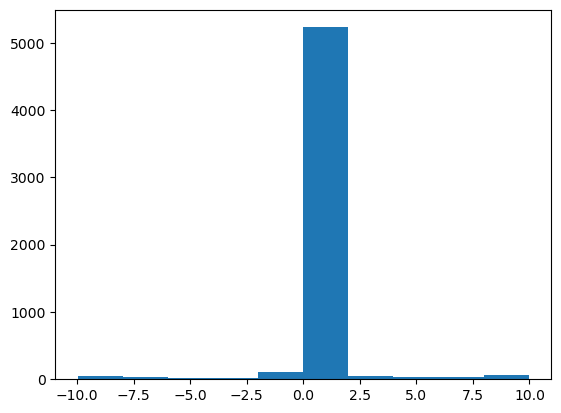

In [59]:
plt.hist(flujos_t_cancer3)

In [60]:
flujos_t_normal= pd.concat([flujos_t_normal1,flujos_t_normal2,flujos_t_normal3], axis=1)
flujos_t_normal

,Flujos_Normal1,Flujos_Normal2,Flujos_Normal3
10FTHF7GLUtl,0.0,0.0,0.000000
10FTHF7GLUtm,0.0,0.0,0.000000
10FTHFtl,0.0,0.0,0.000000
11DOCRTSLtm,0.0,0.0,0.000000
11DOCRTSLtr,0.0,0.0,0.000000
...,...,...,...
sink_asp_L[c],NaN,NaN,9.838519
sink_tyr_L[c],NaN,NaN,-6.821581
DM_5cysdopa[c],NaN,NaN,0.000000
DM_4abut[c],NaN,NaN,0.000000


In [61]:
flujos_t_cancer= pd.concat([flujos_t_cancer1,flujos_t_cancer2,flujos_t_cancer3], axis=1)
flujos_t_cancer

,Flujos_Cancer1,Flujos_Cancer2,Flujos_Cancer3
10FTHF7GLUtl,0.0,0.000000,0.000000
10FTHF7GLUtm,0.0,0.000000,0.000000
10FTHFtl,0.0,0.000000,0.000000
10FTHFtm,0.0,-9.965784,0.000000
11DOCRTSLtm,0.0,NaN,0.000000
...,...,...,...
1A25HVITD2t,NaN,NaN,0.000000
1A25HVITD2tm,NaN,NaN,0.000000
EX_1a25dhvitd2[e],NaN,NaN,0.000000
sink_leu_L[c],NaN,NaN,-5.495131


In [63]:
flujos_t=pd.concat([flujos_t_cancer,flujos_t_normal], axis=1)
flujos_t

,Flujos_Cancer1,Flujos_Cancer2,Flujos_Cancer3,Flujos_Normal1,Flujos_Normal2,Flujos_Normal3
10FTHF7GLUtl,0.0,0.000000,0.0,0.0,0.0,0.000000
10FTHF7GLUtm,0.0,0.000000,0.0,0.0,0.0,0.000000
10FTHFtl,0.0,0.000000,0.0,0.0,0.0,0.000000
10FTHFtm,0.0,-9.965784,0.0,NaN,0.0,0.000000
11DOCRTSLtm,0.0,NaN,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...
sink_lys_L[c],NaN,NaN,NaN,NaN,NaN,-8.579218
sink_phe_L[c],NaN,NaN,NaN,NaN,NaN,-5.957262
sink_asp_L[c],NaN,NaN,NaN,NaN,NaN,9.838519
sink_tyr_L[c],NaN,NaN,NaN,NaN,NaN,-6.821581


# Volacno Plot

In [64]:
flujos_t

,Flujos_Cancer1,Flujos_Cancer2,Flujos_Cancer3,Flujos_Normal1,Flujos_Normal2,Flujos_Normal3
10FTHF7GLUtl,0.0,0.000000,0.0,0.0,0.0,0.000000
10FTHF7GLUtm,0.0,0.000000,0.0,0.0,0.0,0.000000
10FTHFtl,0.0,0.000000,0.0,0.0,0.0,0.000000
10FTHFtm,0.0,-9.965784,0.0,NaN,0.0,0.000000
11DOCRTSLtm,0.0,NaN,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...
sink_lys_L[c],NaN,NaN,NaN,NaN,NaN,-8.579218
sink_phe_L[c],NaN,NaN,NaN,NaN,NaN,-5.957262
sink_asp_L[c],NaN,NaN,NaN,NaN,NaN,9.838519
sink_tyr_L[c],NaN,NaN,NaN,NaN,NaN,-6.821581


In [65]:
from scipy import stats
from statsmodels.stats import multitest
import seaborn as sns

In [66]:
normal_columns=['Flujos_Normal1','Flujos_Normal2','Flujos_Normal3']
cancer_columns=['Flujos_Cancer1','Flujos_Cancer2','Flujos_Cancer3']

normal_df_selected=flujos_t[normal_columns]
cancer_df_selected=flujos_t[cancer_columns]


In [69]:
t_statistic, p_values = stats.ttest_ind(normal_df_selected, cancer_df_selected, axis = 0, nan_policy = 'omit')

In [71]:

fold_change = np.mean(cancer_df_selected) - np.mean(normal_df_selected)


In [72]:

reject, q_values = multitest.fdrcorrection(p_values)




In [74]:
t_results = pd.DataFrame({'reaction': normal_df_selected.columns, 'p_value': p_values,'q_value': q_values, 'log_fc': fold_change
})



KeyError: 'p-values'

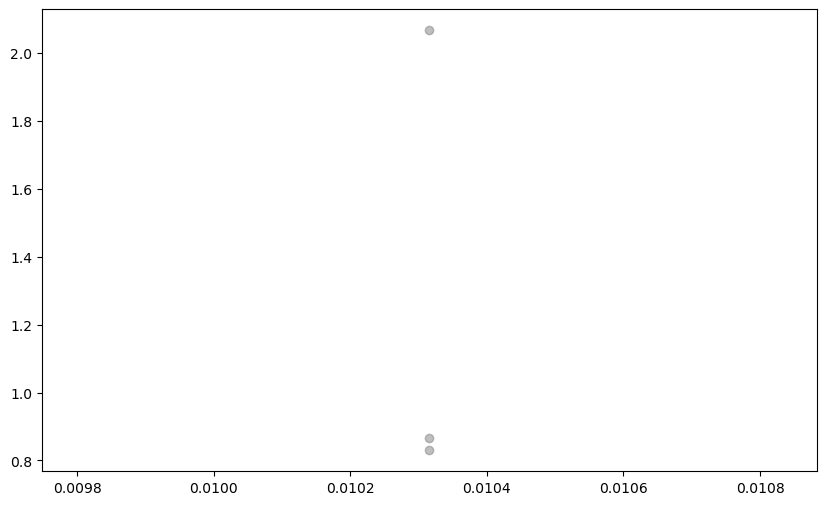

In [83]:
significance_threshold=0.05
significant_results= t_results[t_results['q_value']< significance_threshold]
plt.figure(figsize = (10, 6))

plt.scatter(t_results['log_fc'], -np.log10(t_results['p_value']),color='gray', alpha=0.5, label='No significatico')
plt.scatter(significant_results['log_fc'], -np.log10(significant_results['p-value']),color='red', label='Significativo')

plt.xlabel('Log Fold Change')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot')
plt.legend()
plt.grid(True)
plt.show()

In [81]:
umbral_p_valor = 0.05

# Crear el gráfico de tipo Volcano Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Flujos_Normal1', y=-np.log10(normal_df_selected[normal_columns]),
                color='blue', label='Normal 1', alpha=0.7)
sns.scatterplot(x='Flujos_Cancer1', y=-np.log10(cancer_df_selected[cancer_columns]),
                color='red', label='Cancer 1', alpha=0.7)

# Resaltar puntos significativos (p < umbral_p_valor)
plt.axhline(-np.log10(umbral_p_valor), color='black', linestyle='--', label=f'Umbral p-valor = {umbral_p_valor}')


C:\Users\NOE\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)
C:\Users\NOE\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log10
  result = func(self.values, **kwargs)


ValueError: Could not interpret value `Flujos_Normal1` for parameter `x`

<Figure size 1000x600 with 0 Axes>

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd


t_statistic, p_values = stats.ttest_ind(flujos_t_normal1, flujos_t_cancer1, axis = 0, nan_policy = 'omit')
fold_change = np.log2(np.mean(flujos_t_normal1, axis = 0)) - np.log2(np.mean(flujos_t_cancer1, axis = 0))
fold_change[np.isnan(fold_change)] = 0
p_values[np.isnan(p_values)] = 1.0  
reject, q_values = multitest.fdrcorrection(p_values)

t_results = pd.DataFrame({
    'reaction': flujos_t_normal1.columns,
    'p_value': p_values,
    'q_value': q_values,
    'log_fc': fold_change
})





ValueError: array length 1 does not match index length 2